# Regressão Linear multipla

- Nesse case abordaremos dados sobre limite de crédito de clientes de um banco;
- Iremos aplicar um modelo de regressão linear multipla a fim de prever valores de limite para cada cliente
de acordo com seus aspectos, como Rendimento, Escolaridade, Salário, Idade e demais fatores.

In [207]:
#Importando bibliotecas 
import pandas as pd 
import numpy as np 

#Visualizações 
import matplotlib.pyplot as plt 
import seaborn as sns 

#Regressão e Metrics 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [208]:
#Carregando df 
df = pd.read_excel('limite_credito.xlsx')

## Análise Explorátoria

In [209]:
#Visualização geral 
df.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,Fundamental_Medio,RJ,F,500
1,68,5000,5000,380,Fundamental_Medio,RJ,F,600
2,44,5800,5800,500,Fundamental_Medio,RJ,F,800
3,72,4300,4300,2000,Fundamental_Medio,RJ,F,1000
4,75,4400,4400,3000,Fundamental_Medio,RJ,F,1000


In [210]:
#Infos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Idade                    48 non-null     int64 
 1   RendimentoTotal          48 non-null     int64 
 2   Salario                  48 non-null     int64 
 3   LimitedeCreditoImediato  48 non-null     int64 
 4   Escolaridade             48 non-null     object
 5   Gênero                   48 non-null     object
 6   Região                   48 non-null     object
 7   LimitedoChequeEspecial   48 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 3.1+ KB


In [211]:
#Estatísticas 
df.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,61.458333,12275.083333,10507.125000,2175.208333,5620.729167
std,15.284477,12640.654241,9332.173617,938.094469,6131.900367
min,30.000000,4300.000000,4027.000000,340.000000,500.000000
25%,47.000000,6380.000000,5950.000000,1925.000000,2262.500000
50%,66.500000,8400.000000,7400.000000,2000.000000,3550.000000
75%,70.000000,12378.250000,10163.000000,3000.000000,6500.000000
max,94.000000,81000.000000,54500.000000,3500.000000,35000.000000


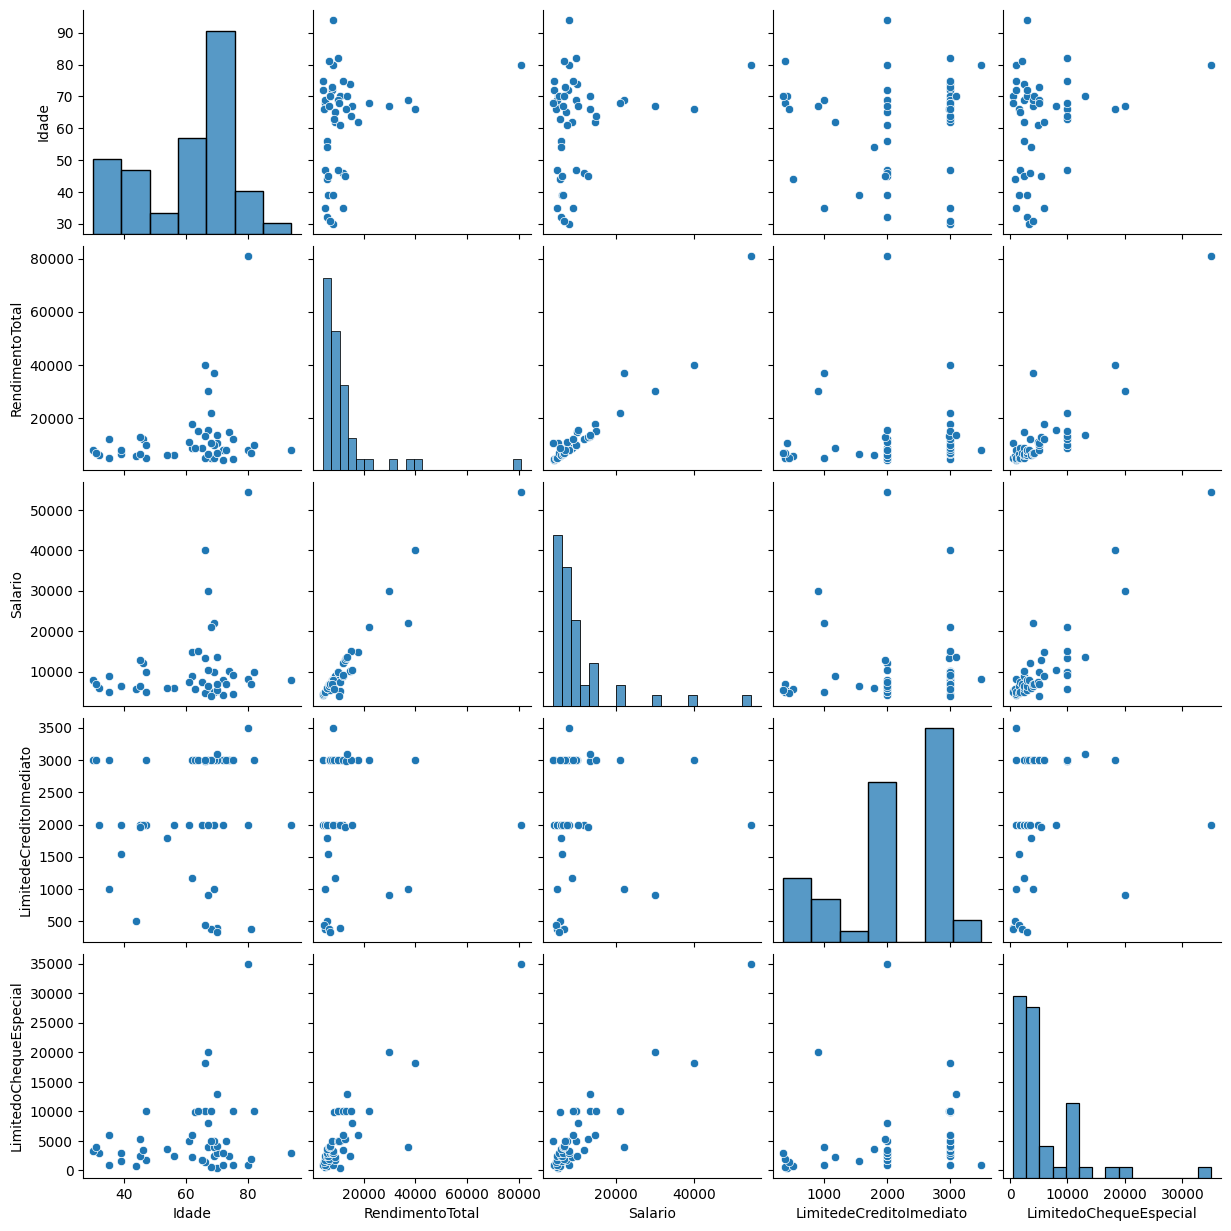

In [212]:
#Correlação 
sns.pairplot(df)

Heatmap

Text(0.5, 1.0, 'Heatmap de correlação')

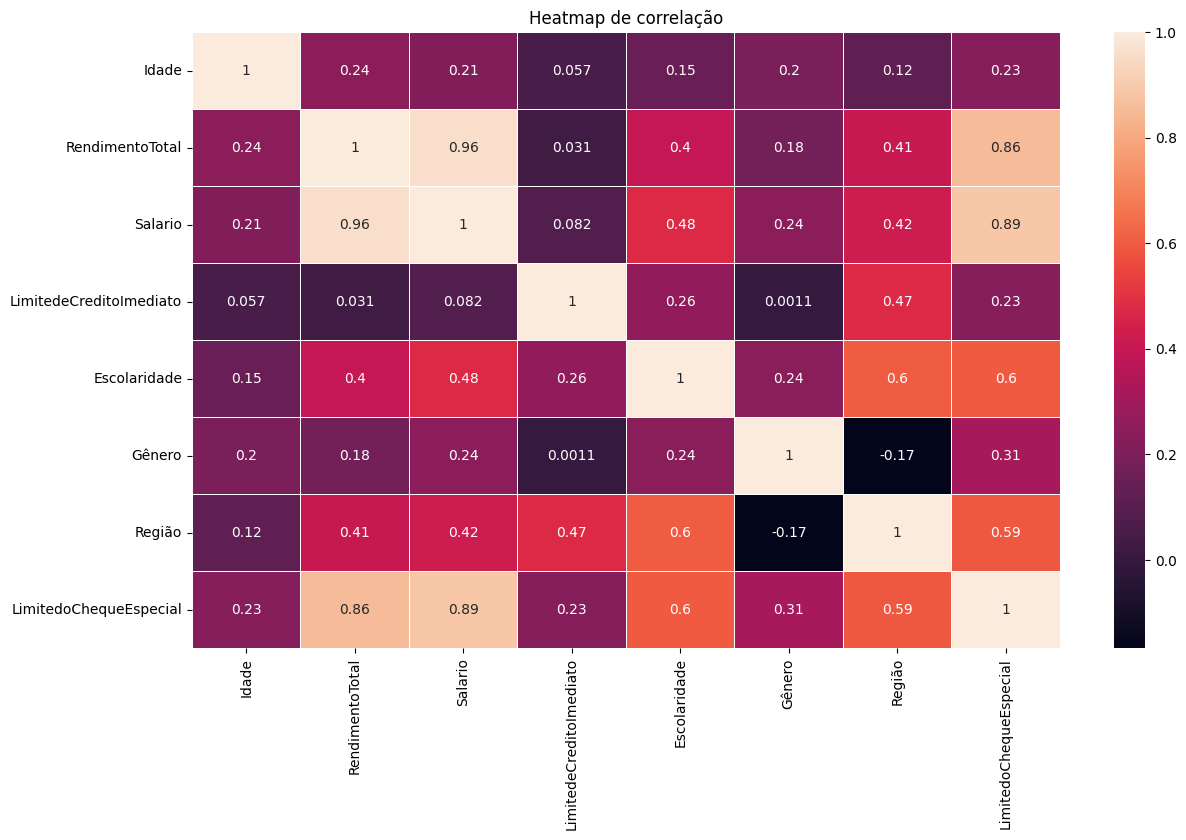

In [251]:
#Variável 
df_corr = df.corr()

#Gráfico
fig = plt.figure(figsize=(14,8))
sns.heatmap(df_corr, annot= True, cmap= 'rocket', linewidths= 0.5)

#Titulo e eixos 
plt.title('Heatmap de correlação')

Análise: 
- Após analisarmos o gráfico de correlação entre nossas variáveis explicativas vs target podemos ver que o limite do cheque especial 
se relaciona de forma linear com as variáveis 'Salário' e 'RendimentoTotal';
- Com isso podemos inferir que essas duas variáveis explicam grande parte dos valores dos limites dos clientes.

In [214]:
df.columns

Index(['Idade', 'RendimentoTotal', 'Salario', 'LimitedeCreditoImediato',
       'Escolaridade', 'Gênero', 'Região', 'LimitedoChequeEspecial'],
      dtype='object')

**Padronizando variáveis categóricas**

In [215]:
#Normalizando variáveis caregoricas 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Colunas categoricas 
cols = df[['Escolaridade', 'Gênero', 'Região']]

#Loop com le 
for col in cols:
    df[col] = le.fit_transform(df[col])
    
df.head()



,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,0,0,0,500
1,68,5000,5000,380,0,0,0,600
2,44,5800,5800,500,0,0,0,800
3,72,4300,4300,2000,0,0,0,1000
4,75,4400,4400,3000,0,0,0,1000


Histogramas

<Axes: xlabel='Idade', ylabel='Count'>

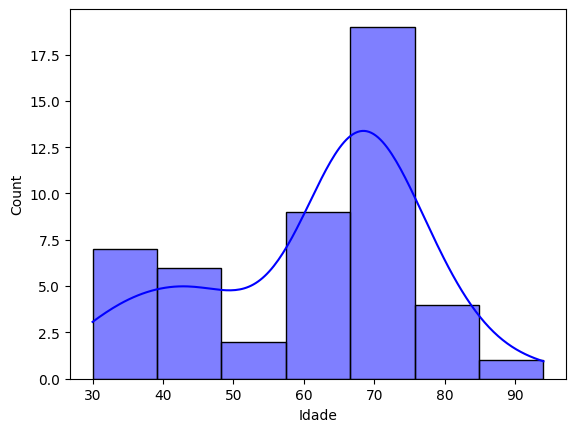

In [216]:
#Idade
sns.histplot(df, x ='Idade', kde= True, color = 'blue')

<Axes: xlabel='RendimentoTotal', ylabel='Count'>

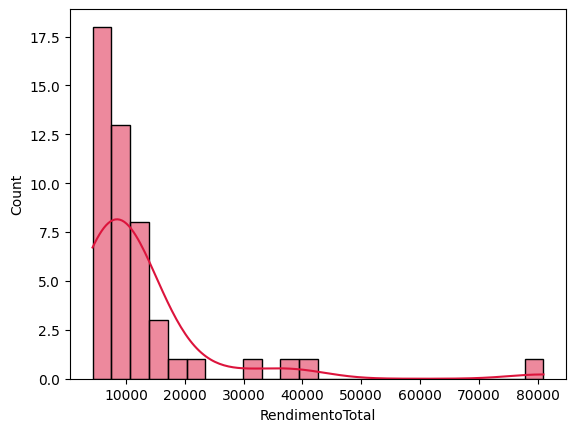

In [217]:
#Rendimento total  
sns.histplot(df, x = 'RendimentoTotal', kde= True, color= 'crimson')

<Axes: xlabel='Salario', ylabel='Count'>

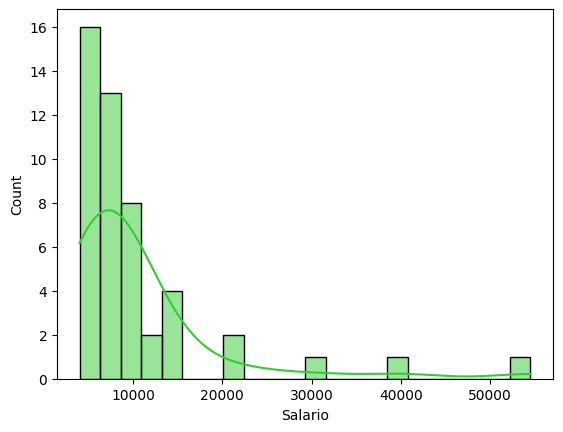

In [218]:
#Salário 
sns.histplot(df, x ='Salario', kde= True, color = 'limegreen')

<Axes: xlabel='LimitedeCreditoImediato', ylabel='Count'>

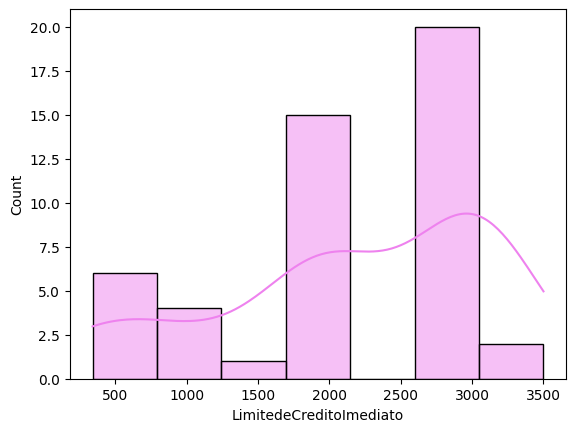

In [219]:
#Limite credito imediato 
sns.histplot(df, x = 'LimitedeCreditoImediato', kde= True, color = 'violet')

<Axes: xlabel='LimitedoChequeEspecial', ylabel='Count'>

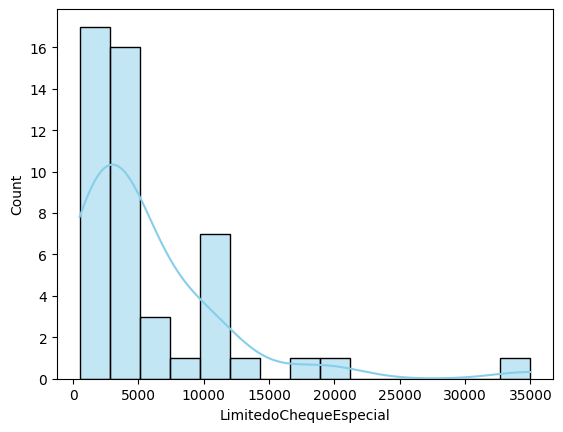

In [220]:
#Limite do cheque especial 
sns.histplot(df, x=  'LimitedoChequeEspecial', kde= True, color = 'skyblue')

**Normalização**


Min Max Scaler 

In [221]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Aplicando e ja transformando em df 
df_norm = pd.DataFrame(scaler.fit_transform(df), index = df.index, columns = df.columns)

df_norm.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,0.625000,0.083911,0.023518,0.018987,0.0,0.0,0.0,0.000000
1,0.593750,0.009126,0.019278,0.012658,0.0,0.0,0.0,0.002899
2,0.218750,0.019557,0.035128,0.050633,0.0,0.0,0.0,0.008696
3,0.656250,0.000000,0.005409,0.525316,0.0,0.0,0.0,0.014493
4,0.703125,0.001304,0.007390,0.841772,0.0,0.0,0.0,0.014493


In [222]:
#Infos estatísticas após a normalização 
df_norm.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.491536,0.103978,0.128388,0.580762,0.375000,0.458333,0.500000,0.148427
std,0.238820,0.164806,0.184894,0.296865,0.489246,0.503534,0.505291,0.177736
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.265625,0.027119,0.038100,0.501582,0.000000,0.000000,0.000000,0.051087
50%,0.570312,0.053455,0.066828,0.525316,0.000000,0.000000,0.500000,0.088406
75%,0.625000,0.105323,0.121570,0.841772,1.000000,1.000000,1.000000,0.173913
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 **Modelo OLS** 
- Agora vamos implentar o modelo OLS diversas vezes para identificarmos quais variáveis explicam melhor o nosso limite do cheque especial.

In [223]:
#Lib ols 
import statsmodels.formula.api as smf 

#Modelo MRLS com minha target + variáveis explicativas
function = 'LimitedoChequeEspecial~Idade+RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade+Região+Gênero'

#Aplicando
model = smf.ols(formula= function, data = df_norm).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.886
Model:                                OLS   Adj. R-squared:                  0.865
Method:                     Least Squares   F-statistic:                     44.20
Date:                    Wed, 16 Oct 2024   Prob (F-statistic):           7.44e-17
Time:                            22:33:21   Log-Likelihood:                 67.328
No. Observations:                      48   AIC:                            -118.7
Df Residuals:                          40   BIC:                            -103.7
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

*Análise*: 
- Ao analisarmos os P-values das varíaveis podemos destacar 'Salário' como a variável que mais explica nosso modelo, 'Região' e 'Genero' também são
variáveis que talves possamos usar;
- As demais variáveis não são explicitamente significativas no modelo, com P-Values altos.

R² de 88% = mostra que nosso modelo explica muito bem nosso limite de cheque especial.

In [224]:
#Aplicando o OLS com as melhores variáveis 
function = 'LimitedoChequeEspecial~Salario+Região+Gênero-1'

model = smf.ols(formula= function, data = df_norm).fit()
print(model.summary())

                                   OLS Regression Results                                  
Dep. Variable:     LimitedoChequeEspecial   R-squared (uncentered):                   0.925
Model:                                OLS   Adj. R-squared (uncentered):              0.920
Method:                     Least Squares   F-statistic:                              185.0
Date:                    Wed, 16 Oct 2024   Prob (F-statistic):                    2.56e-25
Time:                            22:33:22   Log-Likelihood:                          64.573
No. Observations:                      48   AIC:                                     -123.1
Df Residuals:                          45   BIC:                                     -117.5
Df Model:                               3                                                  
Covariance Type:                nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

# Modelagem

In [225]:
#Definindo variáveis explicativas (labels) e target 
X = df_norm[['Salario','Região','Gênero']]
y = df_norm[['LimitedoChequeEspecial']]

Treinamento do modelo

In [226]:
#Train e test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [227]:
#Algoritmo de regressão linear 
lr = LinearRegression()

#Treinando o modelo 
lr.fit(X_train,y_train)

LinearRegression()

In [228]:
#R² 
rsq = lr.score(X,y)
rsq

0.871127025731754

In [229]:
#Predição 
y_pred = lr.predict(X_test)
y_pred

array([[ 0.10696346],
       [-0.03158501],
       [ 0.09879812],
       [ 0.09983839],
       [ 0.05747266],
       [ 0.08131318],
       [ 0.1283387 ],
       [ 0.20998547],
       [-0.02588495],
       [ 0.08853718]])

**Metrics**

In [230]:
#MAE, MSE E RMSE
print('MAE:', mean_absolute_error(y_test,y_pred ))
print('MSE:', mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 0.05676449812940607
MSE: 0.005628472014227287
RMSE: 0.07502314319080004


Análise das métricas: 
- Nossas métricas do modelo sugerem que o modelo está com um ótimo desempenho, pois os erros médios (MAE, MSE, RMSE) são todos bastante baixos, indicando que as previsões do modelo estão bem próximas dos valores reais. 
- Um MAE próximo de zero, MSE baixo, e RMSE baixo indicam que o modelo tem uma boa capacidade preditiva.

**Adicionando valores das previsões**
- Vamos adicionar os valores das previsões como uma coluna para termos noção do quanto nosso modelo conseguiu prever.

In [238]:
#Add a coluna 'Previsão' sem valores
df_norm['Previsão'] = None 

#Add as previsões somente as linhas de teste (X_test)
df_previsoes = df_norm.loc[X_test.index, 'Previsão'] = y_pred

#Removendo os dados com valores 'none'
df_previsoes = df_norm[df_norm['Previsão'].notna()]

In [243]:
#Plotando as previsões
df_previsoes

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial,Previsão
4,0.703125,0.001304,0.007390,0.841772,0.0,0.0,0.0,0.014493,-0.031585
7,0.562500,0.006519,0.015315,0.031646,0.0,0.0,0.0,0.028986,-0.025885
10,0.546875,0.058670,0.064847,0.525316,0.0,1.0,0.0,0.037101,0.088537
26,0.015625,0.034250,0.057456,0.841772,0.0,0.0,1.0,0.101449,0.098798
29,0.484375,0.087353,0.068809,0.525316,1.0,0.0,1.0,0.128406,0.106963
30,0.671875,0.046806,0.058903,0.841772,0.0,0.0,1.0,0.130435,0.099838
32,0.593750,0.081186,0.000000,0.841772,0.0,0.0,1.0,0.130435,0.057473
34,0.078125,0.100391,0.098528,0.841772,1.0,0.0,1.0,0.159420,0.128339
37,0.515625,0.057366,0.033146,0.841772,0.0,0.0,1.0,0.272464,0.081313
40,0.703125,0.102999,0.102490,0.841772,1.0,1.0,1.0,0.275362,0.209985


**Valores reais vs Predições**

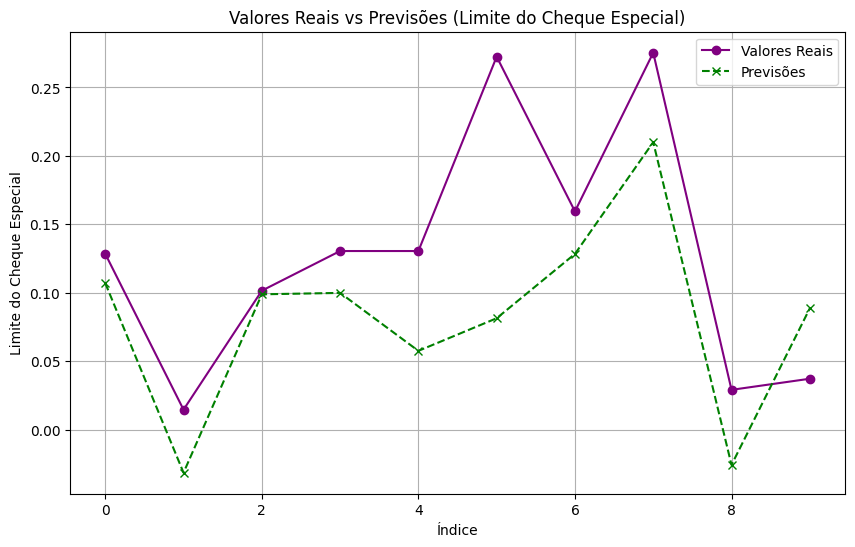

In [254]:
#Grafico
plt.figure(figsize=(10, 6))

# Plotando os valores reais e as previsões para comparação
plt.plot(y_test.values, label='Valores Reais', color='purple', marker='o')
plt.plot(y_pred, label='Previsões', color='green', linestyle='--', marker='x')

# Rótulos e título
plt.title('Valores Reais vs Previsões (Limite do Cheque Especial)')
plt.xlabel('Índice')
plt.ylabel('Limite do Cheque Especial')
plt.legend()
plt.grid(True)
plt.show()

**Conclusão:**
- Podemos concluir que nosso modelo se saiu bem visto que nossas métricas e nosso R² tiveram valores muito bons, como visto anteriormente.
- As previsões do conjunto de teste nos mostram que os a maioria dos valores previstos chegaram perto dos valores reais, como visto acima, porém existem alguns valores distantes.
- Conseguimos também analisar que para o valor a ser destiado ao Limite do Cheque Especial depende muito das variáveis como o Salário, Região e Gênero do cliente.